In [1]:
# Read the airlines data and answer the following:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Airlines_data.xlsx", sheet_name="data")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Airlines_Name               3728 non-null   object 
 1   Departure_City              3728 non-null   object 
 2   Flight_Time_status          3728 non-null   object 
 3   Arrival_City                3728 non-null   object 
 4   Flight_time (in minutes)    3339 non-null   float64
 5   Flight_distance (in miles)  3728 non-null   object 
dtypes: float64(1), object(5)
memory usage: 174.9+ KB


([<matplotlib.patches.Wedge at 0x2726b473a30>,
 [Text(-0.7393908564015431, 0.8144330306844099, 'On time'),
  Text(0.739390856401543, -0.81443303068441, 'Delayed')],
 [Text(-0.4033041034917507, 0.4442361985551326, '73.46%'),
  Text(0.40330410349175067, -0.4442361985551327, '26.54%')])

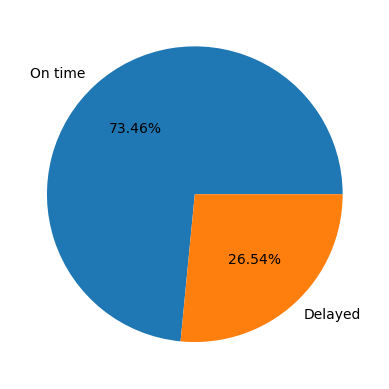

In [2]:
# 1. How to visually analyze the proportion of total flights that got delayed among those arriving in Bengaluru?
x = df.query(""" Arrival_City == "Bengaluru" and (Flight_Time_status == "On time" or Flight_Time_status == "Delayed")""")["Flight_Time_status"].value_counts().sort_values(ascending=False)
plt.pie(x.values, labels=x.index, autopct="%0.2f%%")

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'KLM'),
  Text(2, 0, 'Air France'),
  Text(3, 0, 'Turkish Airlines'),
  Text(4, 0, 'Emirates'),
  Text(5, 0, 'American Airlines'),
  Text(6, 0, 'Qatar Airways'),
  Text(7, 0, 'SpiceJet'),
  Text(8, 0, 'AirAsia India')])

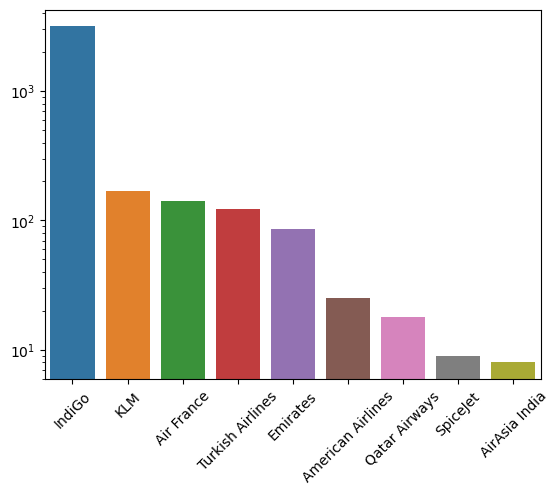

In [3]:
# 2. Which carriers have the most flights according to the provided dataset?
x = df["Airlines_Name"].value_counts().sort_values(ascending=False)
sns.barplot(x.index, x.values).set_yscale("log")
plt.xticks(rotation=45)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Kolkata'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Chennai'),
  Text(5, 0, 'Pune'),
  Text(6, 0, 'Mangalore'),
  Text(7, 0, 'Kochi'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Dubai')])

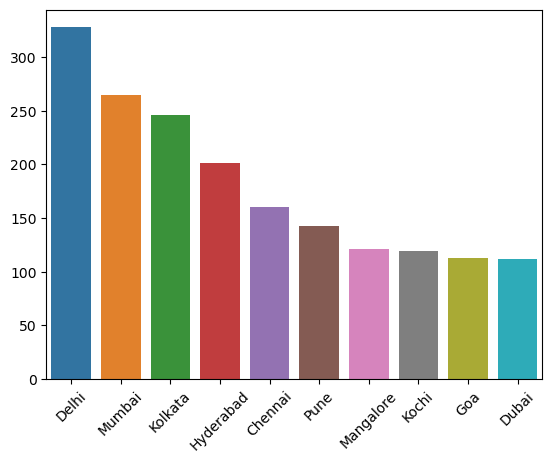

In [4]:
# 3. What are the top 10 cities with the highest number of departures for IndiGo flights?
x = df["Departure_City"].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x.index, x.values)
plt.xticks(rotation=45)

([<matplotlib.patches.Wedge at 0x2726c0a5550>,
 [Text(0.8833053769959123, 0.6555696842976415, 'Mumbai'),
  Text(-0.13929168191659566, 1.0911451907738245, 'Delhi'),
  Text(-0.8488857354681785, 0.69956630001641, 'Lucknow'),
  Text(-1.0971060152593664, 0.07973952145401637, 'Pune'),
  Text(-0.9725713262334117, -0.5139114859473203, 'Mangalore'),
  Text(-0.5660477419116308, -0.9431807641575097, 'Hyderabad'),
  Text(-0.011971203851935897, -1.0999348572885286, 'Kolkata'),
  Text(0.5174363024967849, -0.970700609280975, 'Kochi'),
  Text(0.8973642987624318, -0.6361896850048806, 'Goa'),
  Text(1.078961009269247, -0.2141101129715459, 'Ahmedabad')],
 [Text(0.48180293290686116, 0.3575834641623499, '20.3%'),
  Text(-0.0759772810454158, 0.5951701040584497, '13.4%'),
  Text(-0.46302858298264277, 0.381581618190769, '10.6%'),
  Text(-0.5984214628687452, 0.04349428442946347, '9.0%'),
  Text(-0.53049345067277, -0.2803153559712656, '8.8%'),
  Text(-0.3087533137699804, -0.5144622349950053, '8.5%'),
  Text(-0.

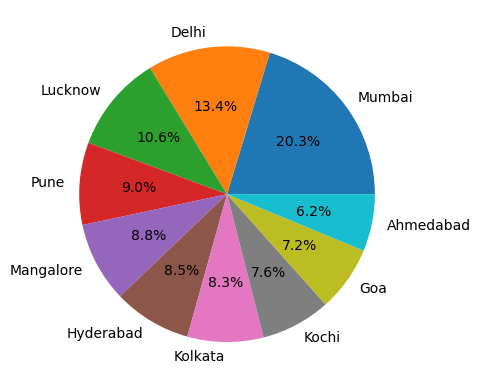

In [5]:
# 4. Which cities have the most delayed departures among IndiGo flights?
# What differences have you noticed between this and the previous analysis?
x = df.query(""" Airlines_Name == "IndiGo" and Flight_Time_status == "Delayed" """)["Departure_City"].value_counts().sort_values(ascending=False).head(10)
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')

In [6]:
# 5. Are there any noticeable differences in the concentration or spread of flight durations among airlines?
#    Were you able to discern any noticeable patterns that suggest differences in the scheduling practices of the airlines?
x = df.dropna()
y = x.groupby(["Airlines_Name", "Departure_City", "Flight_Time_status"]).agg({"Flight_time (in minutes)": np.mean}).reset_index()
z = df[df["Flight_time (in minutes)"].isnull()]
"""
x = df without nulls
z = df with only nulls
y = average duration for every airline, route, and flight status
"""

'\nx = df without nulls\nz = df with only nulls\ny = average duration for every airline, route, and flight status\n'

In [7]:
for i in range(z.shape[0]):
    try: z.iloc[i, 4] = y[(y.iloc[:, 0] == z.iloc[i, 0]) & 
                          (y.iloc[:, 1] == z.iloc[i, 1]) & 
                          (y.iloc[:, 2] == z.iloc[i, 2])].iloc[0, 3]
    except: continue
z = z.dropna()

In [8]:
x = pd.concat([x, z])
x["Speed"] = x["Flight_distance (in miles)"] / x["Flight_time (in minutes)"]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'AirAsia India'),
  Text(1, 0, 'SpiceJet'),
  Text(2, 0, 'Air France'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'KLM'),
  Text(5, 0, 'Turkish Airlines'),
  Text(6, 0, 'American Airlines'),
  Text(7, 0, 'Qatar Airways'),
  Text(8, 0, 'Emirates')])

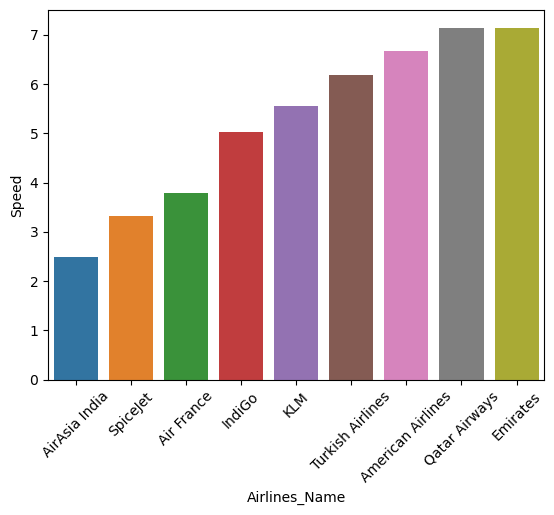

In [9]:
t = x.groupby("Airlines_Name").agg({"Speed": np.mean}).sort_values(by="Speed")
sns.barplot(x=t.index, y=t.Speed)
plt.xticks(rotation=45)